# End to End Medial Diagnostic Use Case 

Steps of the project:
0. Create a virtual environment with python=3.8.13
1. Import and view the data 
2. Check the data for Sanity
3. Perform EDA on data set 
4. Preprocess the data for modelling
5. Fit and Evlaute various Models
6. Optimize the chosen model
7. Interpret the optimized model
8. Pickle and save the model as a pipeline
9. Deploy the model pipeline in streamlit
10. Scale model to cloud using git and streamlit sharing
    

In [1]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [2]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.0 MB/s eta 0:00:00a 0:00:01


In [3]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.5/436.5 kB 2.9 MB/s eta 0:00:00a 0:00:01


In [4]:
# Load all the librarires
# for data manipulation and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# preprocessing modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# modelling modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# modules for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

#for model interpretation
import shap

# deployment module
#import streamlit as st

print("All Libraries are imported")


All Libraries are imported


### 1. Import and view the data 

In [5]:
data=pd.read_csv('data.csv')

In [6]:
data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,1,85,66,29,0,26.6,0.351,31,No
2,2,8,183,64,0,0,23.3,0.672,32,Yes
3,3,1,89,66,23,94,28.1,0.167,21,No
4,4,0,137,40,35,168,43.1,2.288,33,Yes


In [7]:
data.shape


(768, 10)

###  Check the data for Sanity

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [9]:
data.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
# check for any other non real characters
data[~data.applymap(np.isreal).any(1)]

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Observations**
1. Data set has 768 rows and 10 columns( 1 redundant)
2. Dataset has no direct nulls but has nulls imputed as 0
3. Dataset has only 1 categorical variable the Outcome


In [12]:
data.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [13]:
# drop the redundant column
data=data.drop('Unnamed: 0', axis=1)

In [14]:
# treat the nulls
zerofiller=lambda x: x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, axis=0)

In [15]:
#encode categoricals
df=data.copy()
d={'Yes':1, 'No':0}
df['Outcome']=df['Outcome'].map(d)

In [16]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0


### Perform EDA on data set 
1. UNIVARIATES- NUMERICALS
2. UNIVARIATES-CATEGORICALS
3. BIVARIATES-NUMERICAL vs CATEGORICAL
4. BIVARIATES- NUMERICALS VS NUMERICLAS
5. MULTIVARIATE CHARTS 
6. Correlations and Heatmaps 

##### 1. UNIVARIATES

In [17]:
def histograms(data):
    print('Univariate Histogram')
    data.hist()
    plt.tight_layout()
    plt.show()
    

Univariate Histogram


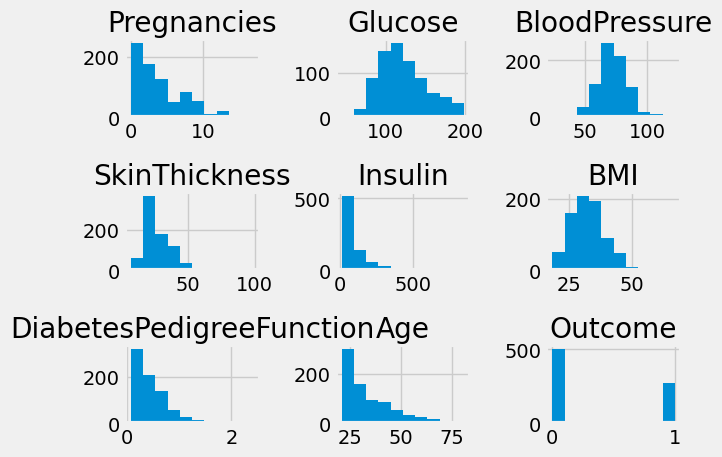

In [18]:
histograms(df)

In [19]:
def barchart(data, feature):
    print("Barchart of Categoricals")
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(data)), (x.mean(),y), ha='center' , va='bottom')                                  
    plt.show()

Barchart of Categoricals


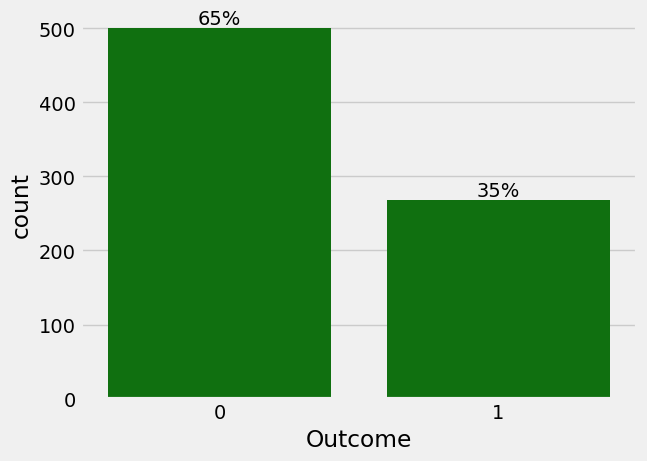

In [20]:
barchart(data=df, feature='Outcome')

**Observations**
Outcome variable is highly imbalanced. We need to solve for data imbalance 

In [21]:
def boxpolot_histplot(data, feature, figsize=(12,7), bins=None):
    print("Univariates of ", feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={'height_ratios':(0.25,0.75)},
    figsize=figsize)
    
    sns.boxplot(data=data,x=feature, showmeans=True, ax=ax_box, color='violet')
    
    sns.histplot(data=data, x=feature, bins=bins, ax=ax_hist, pallete='winter') if bins else\
         sns.histplot(data=data,x=feature, ax=ax_hist)
    plt.axvline(data[feature].mean(),linestyle='--', color='green')
    plt.axvline(data[feature].median(), linestyle='-', color='black')
    plt.show()
    
    
    

Univariates of  Pregnancies


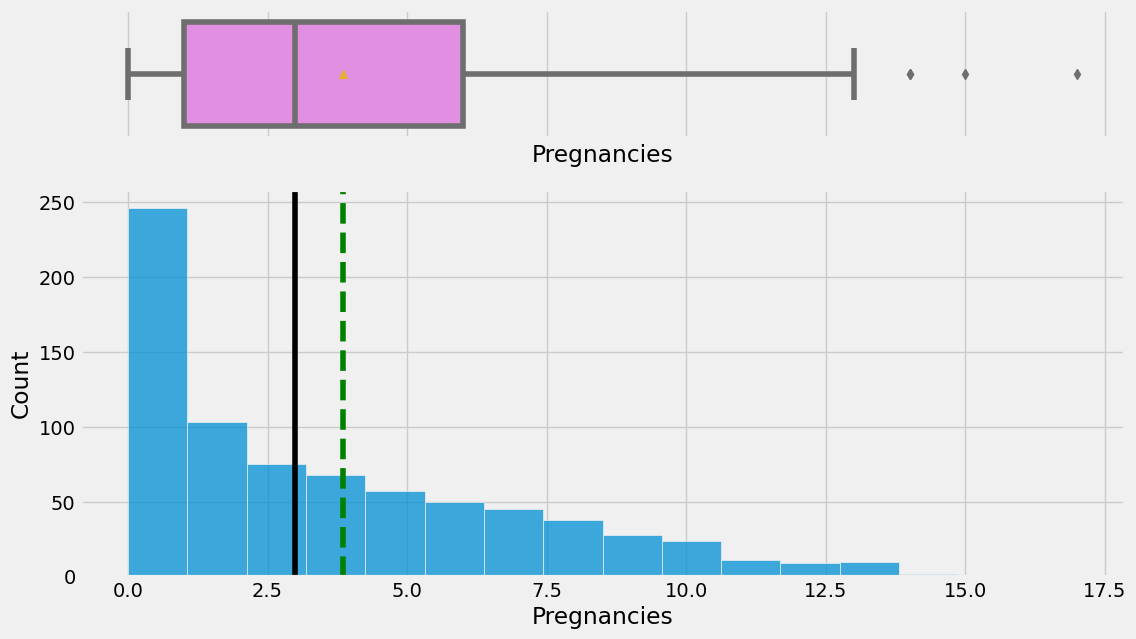

Univariates of  Glucose


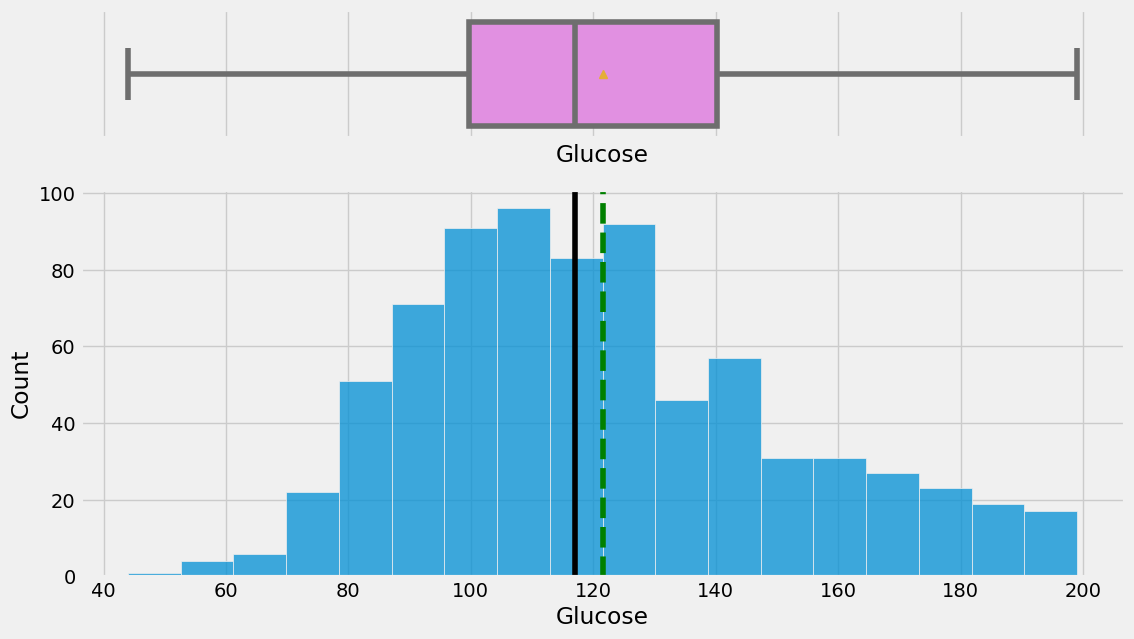

Univariates of  BloodPressure


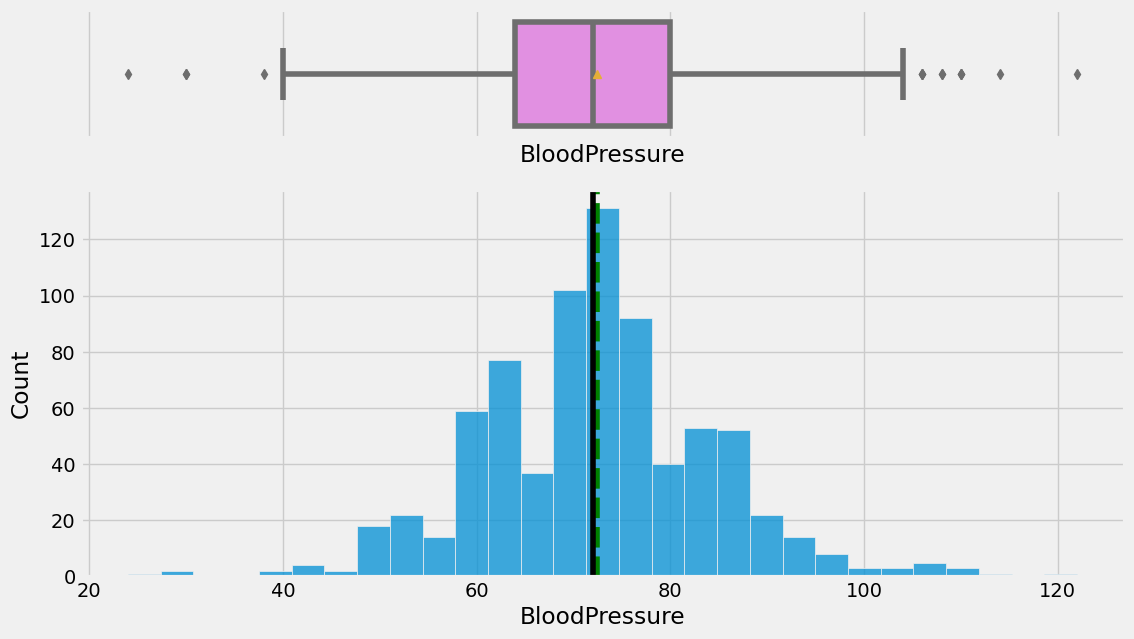

Univariates of  SkinThickness


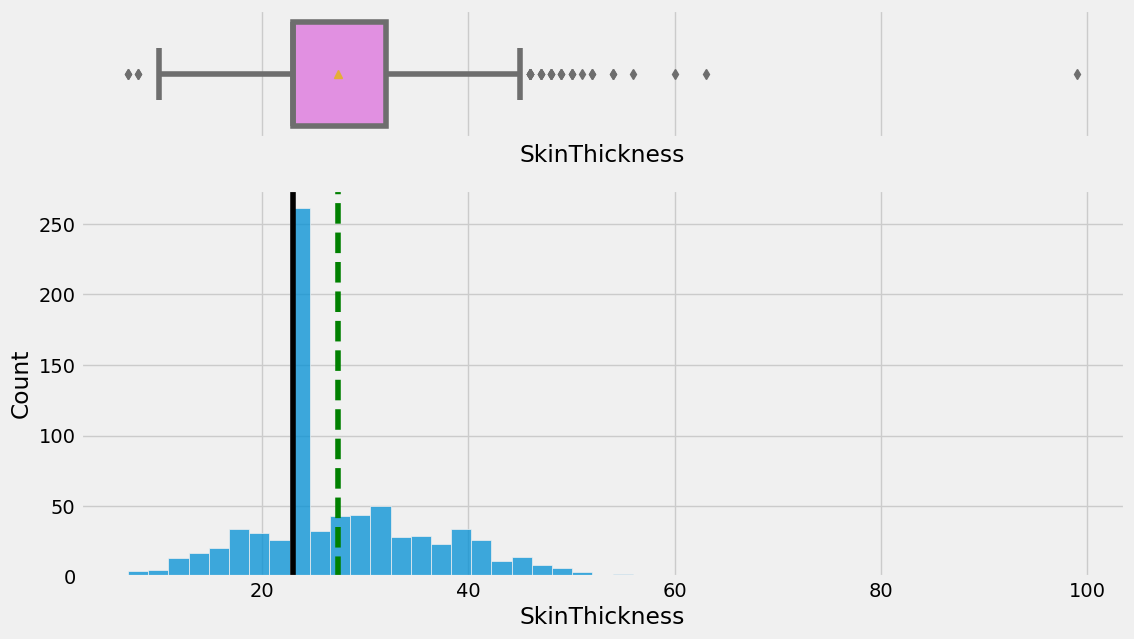

Univariates of  Insulin


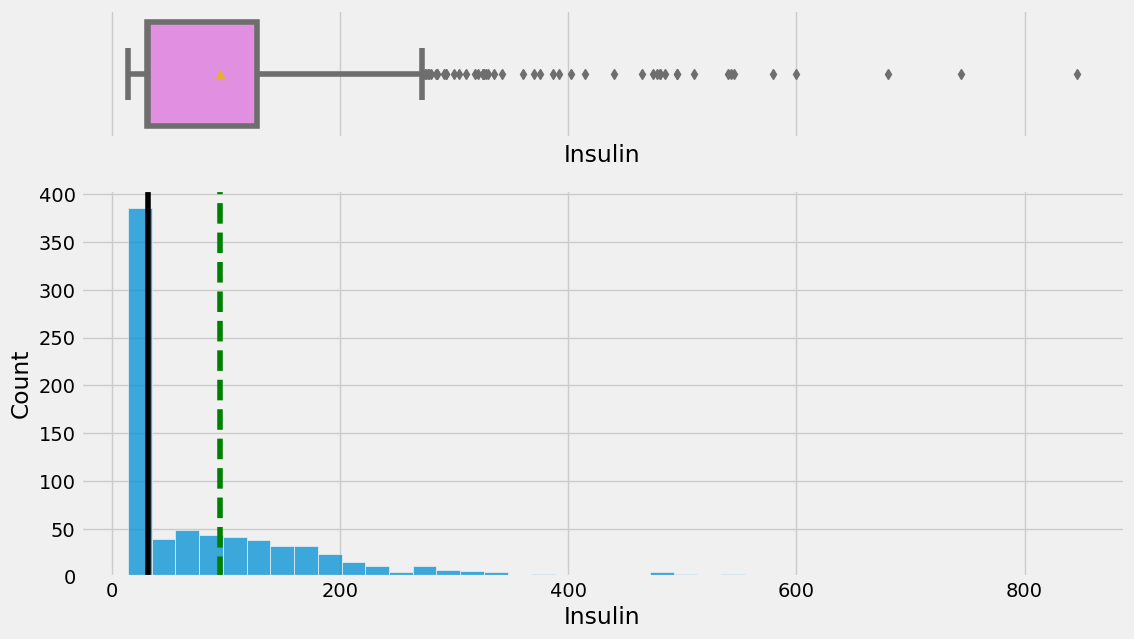

Univariates of  BMI


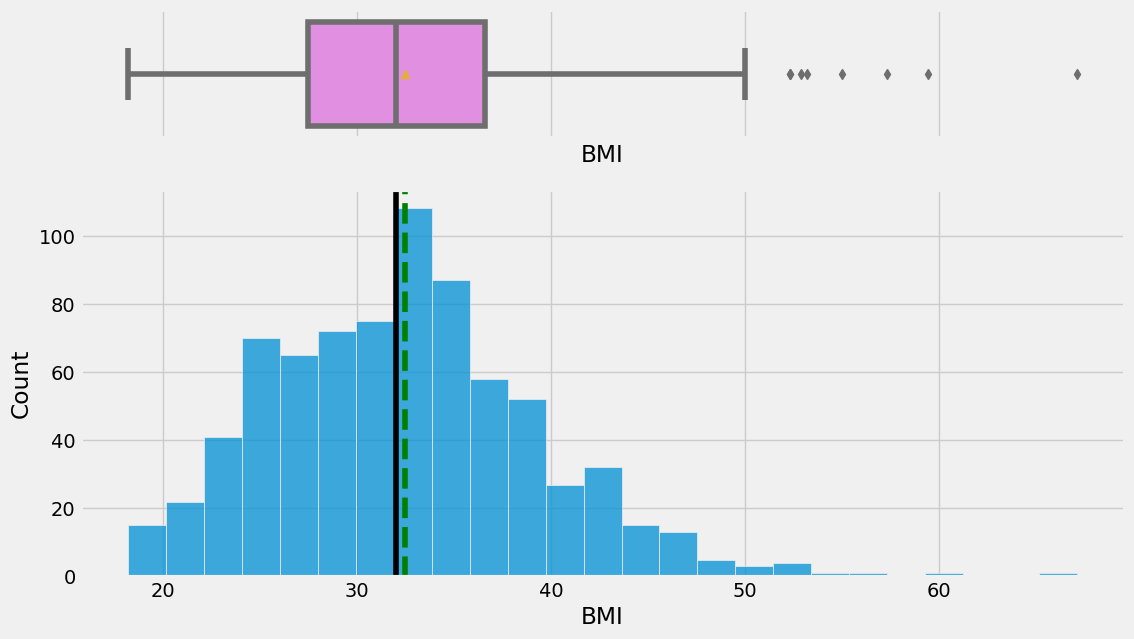

Univariates of  DiabetesPedigreeFunction


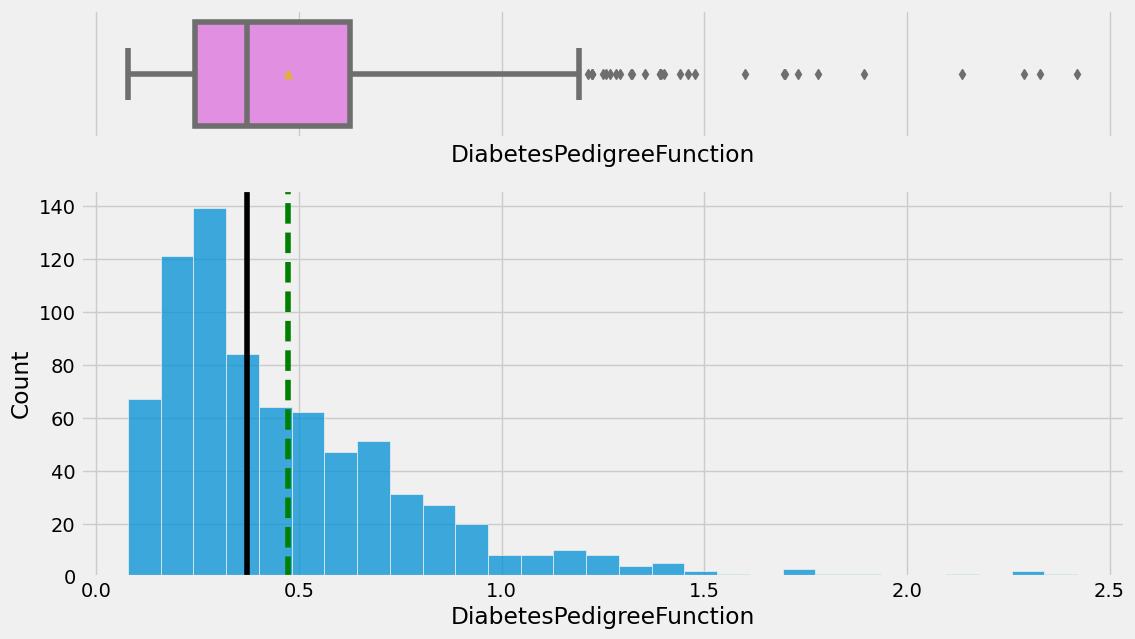

Univariates of  Age


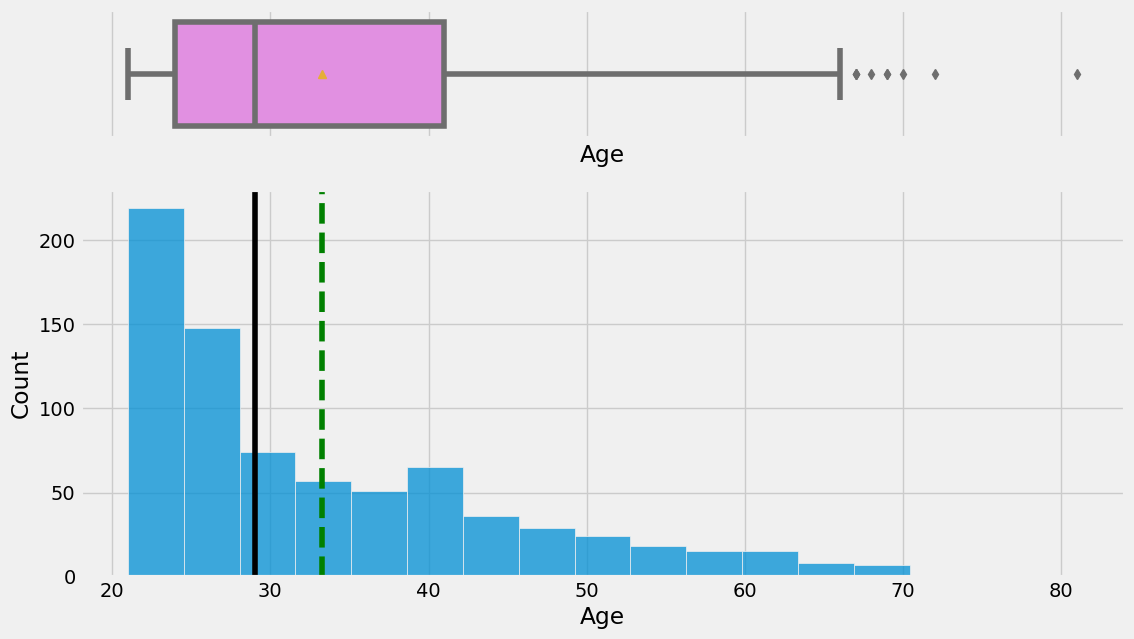

Univariates of  Outcome


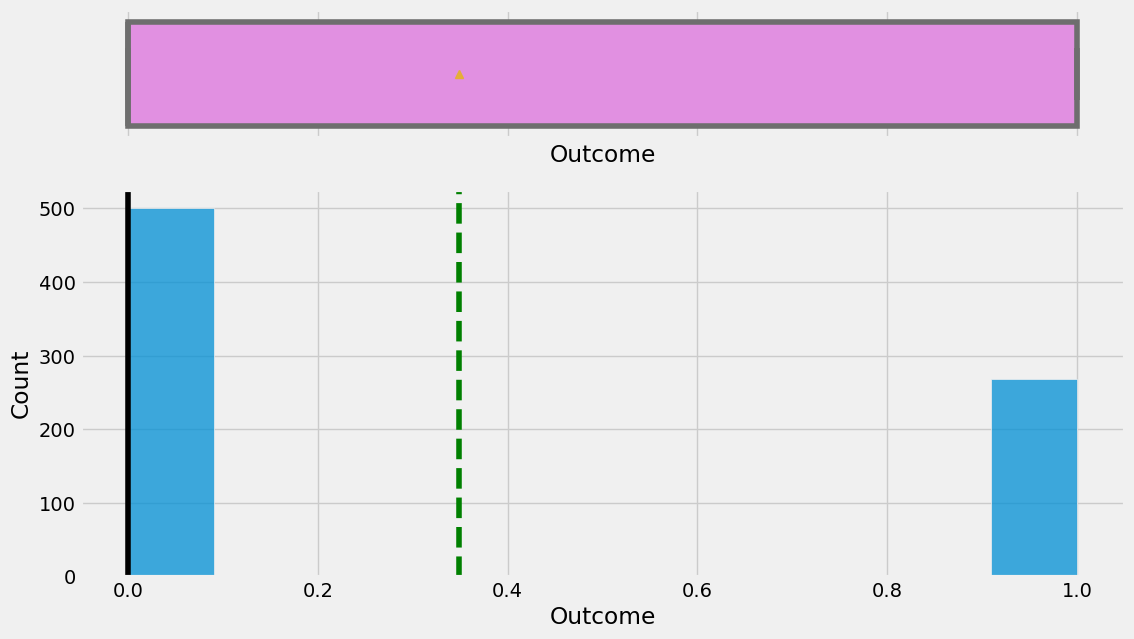

In [22]:
for col in df.select_dtypes(exclude='O').columns:
    boxpolot_histplot(data=df, feature=col)

**Observations**
1. Pregnancies has some suspect outliers which have to be looked upon
2. Skin thickness also has some suspect outliers which need to be taken care of 
3. Insulin is highly right skewed aand may need to be engineered
4. Diabetes pedigree function is also highly right skewed and needs to be engineered.
5. Outcome is highly imbalanced and may need balancing.

##### BIVARIATES-NUMERICAL vs CATEGORICAL

In [23]:
def catnums(data, feature1, feature2):
    print("Bivariate Barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar',color='orange')
    plt.show()

Bivariate Barchart between Outcome and Pregnancies


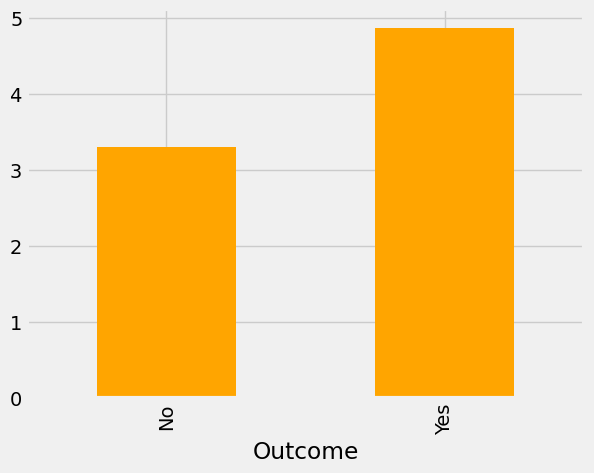

Bivariate Barchart between Outcome and Glucose


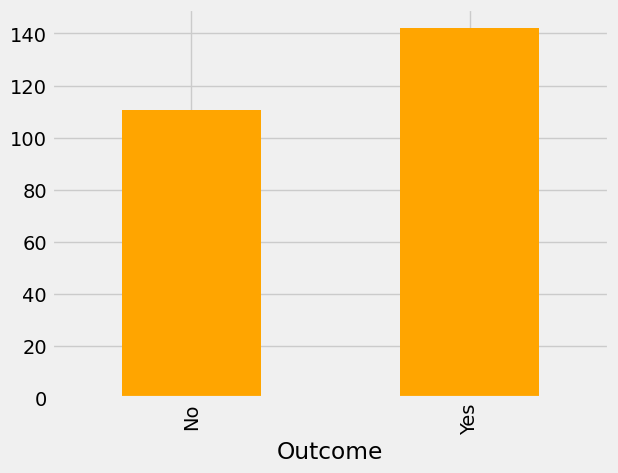

Bivariate Barchart between Outcome and BloodPressure


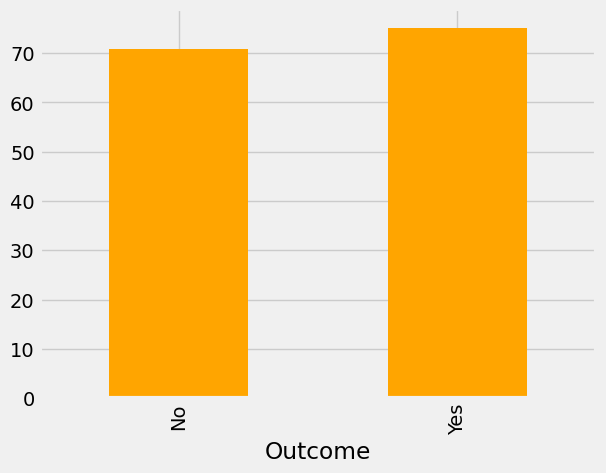

Bivariate Barchart between Outcome and SkinThickness


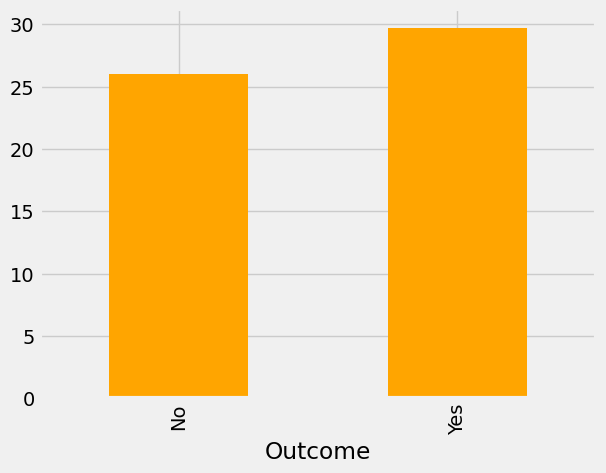

Bivariate Barchart between Outcome and Insulin


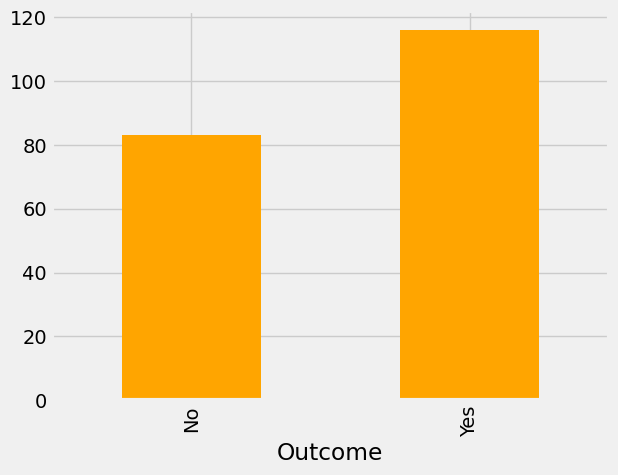

Bivariate Barchart between Outcome and BMI


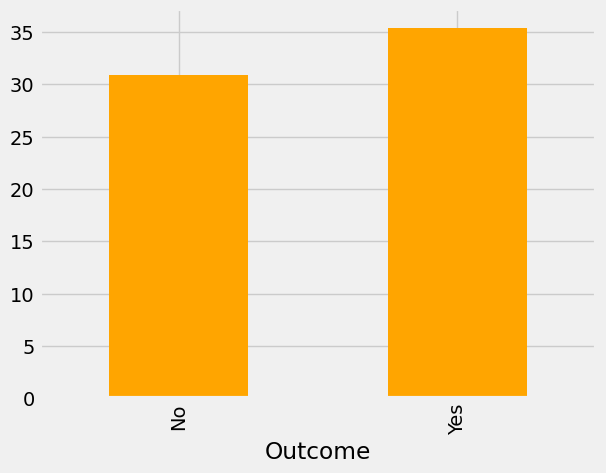

Bivariate Barchart between Outcome and DiabetesPedigreeFunction


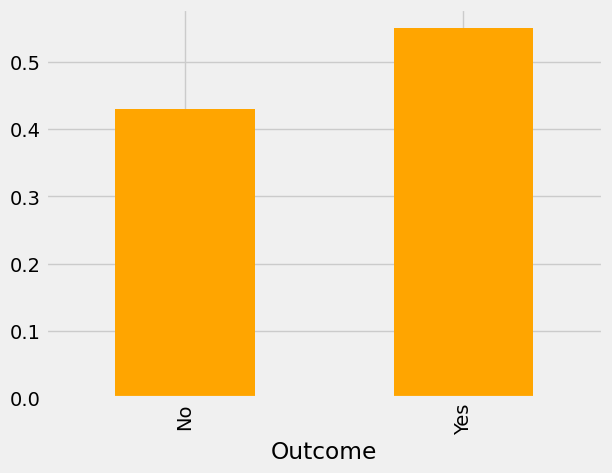

Bivariate Barchart between Outcome and Age


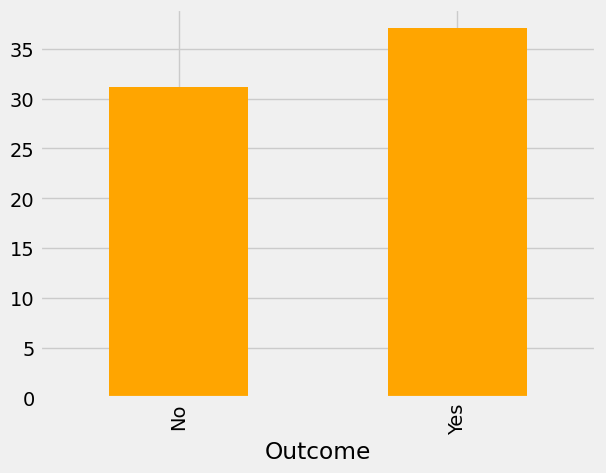

In [24]:
for col in data.select_dtypes(exclude='O').columns:
    catnums(data=data, feature1='Outcome', feature2=col)

**Observations**
Woman with higher pregnancies, higher diabetes predigree functions and Insulin use are more likely to be diabetic

##### BIVARIATES-NUMERICAL vs NUMERICAL

In [25]:
def lineplot_scatterplot(data, feature1, feature2):
    print("Bivariates between {0} and {1}".format(feature1, feature2))
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='blue')
    plt.show()

Bivariates between Pregnancies and Pregnancies


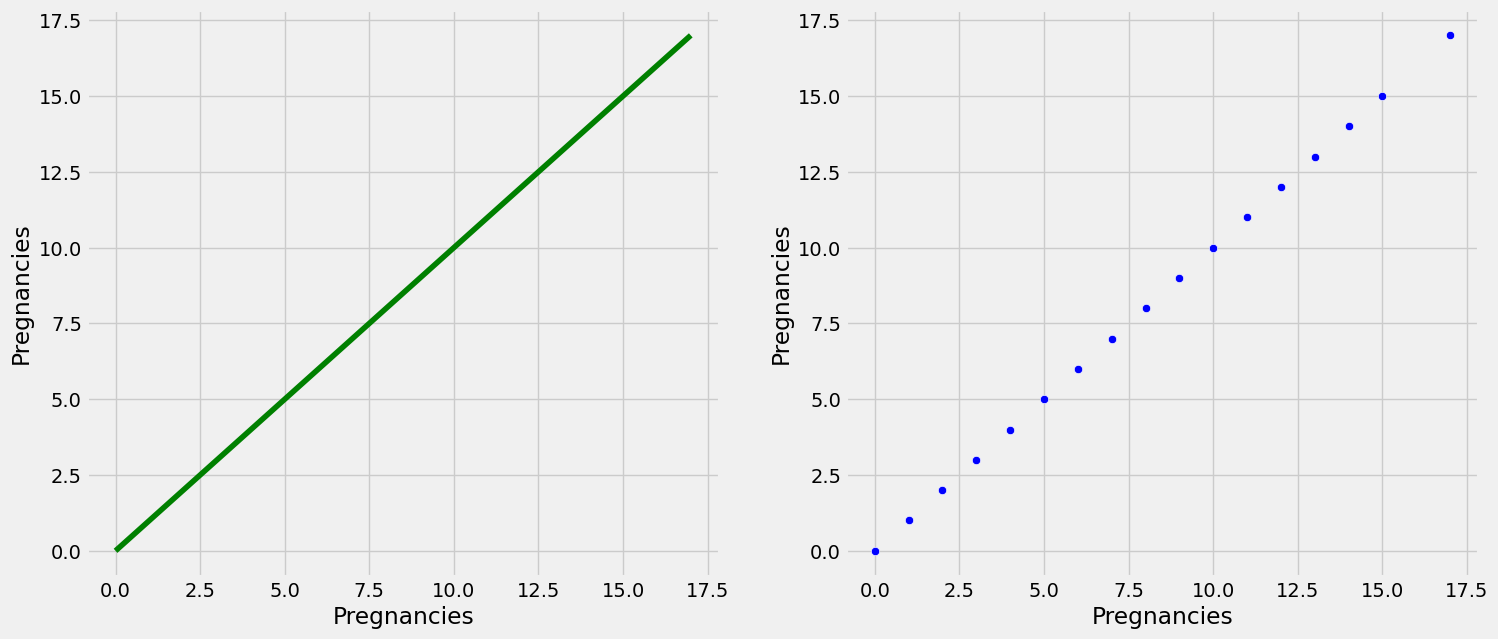

Bivariates between Pregnancies and Glucose


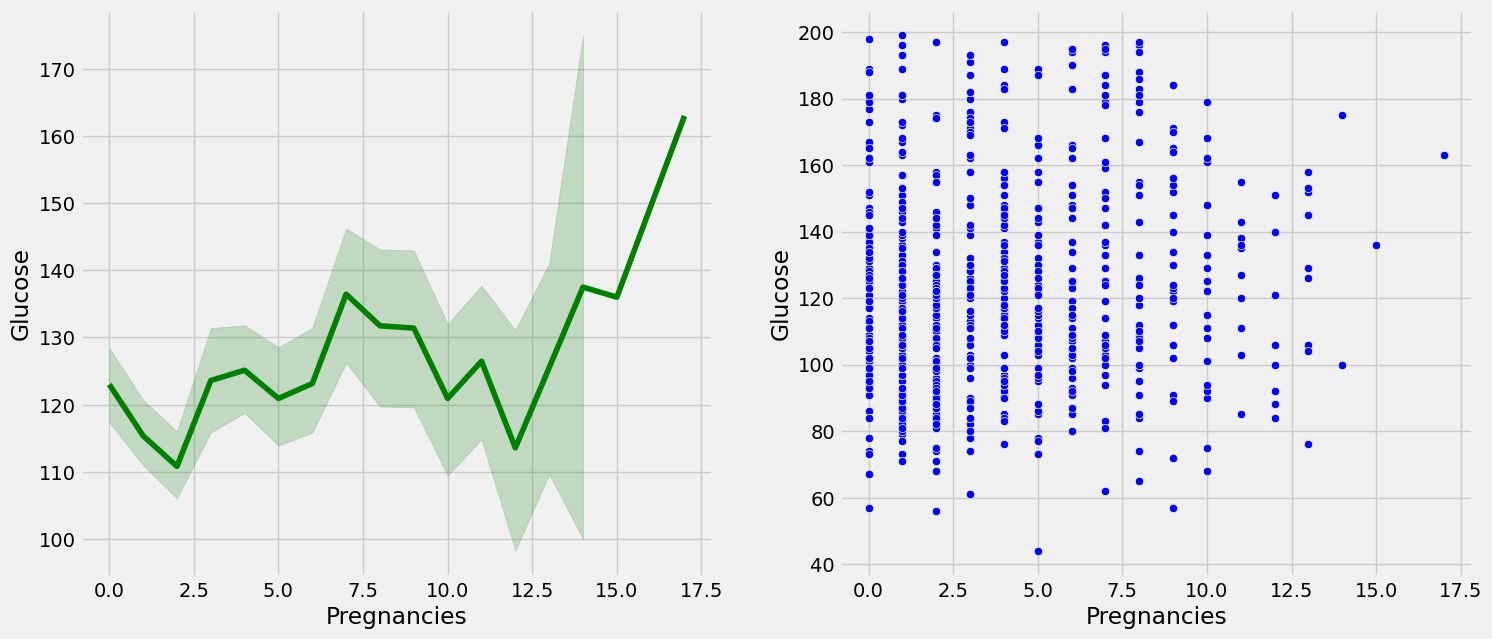

Bivariates between Pregnancies and BloodPressure


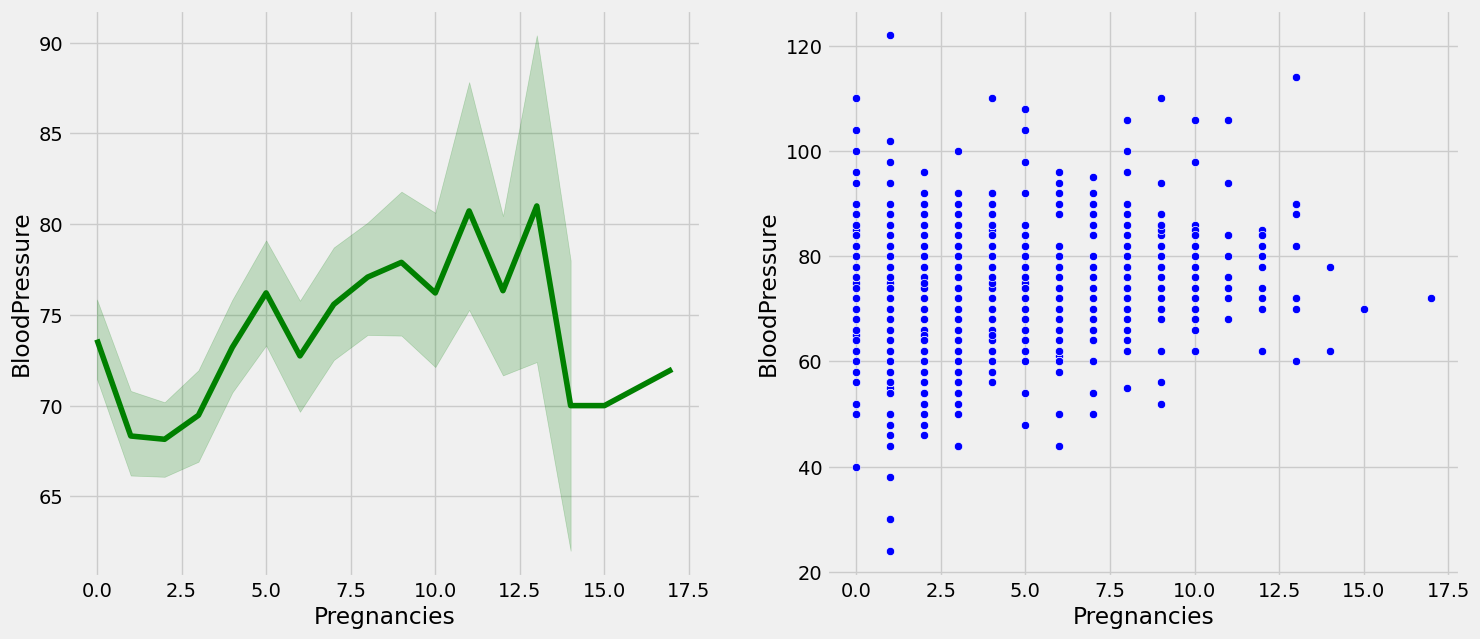

Bivariates between Pregnancies and SkinThickness


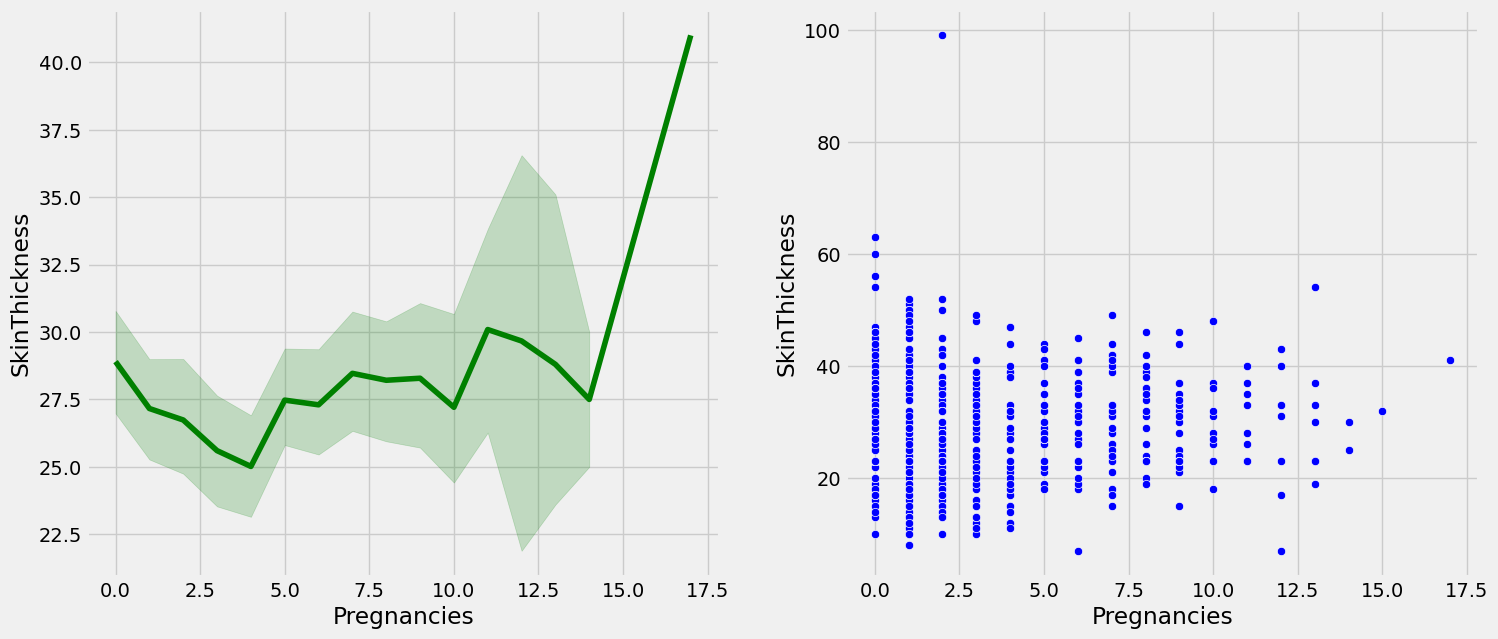

Bivariates between Pregnancies and Insulin


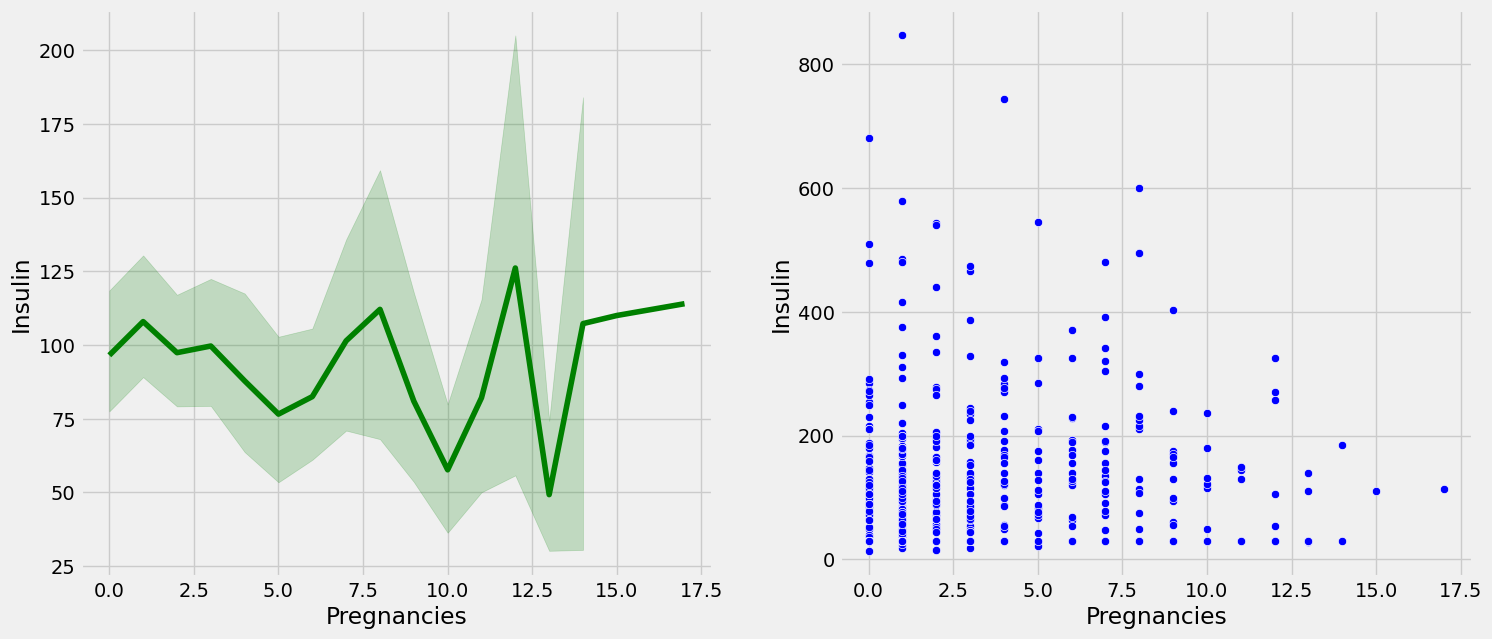

Bivariates between Pregnancies and BMI


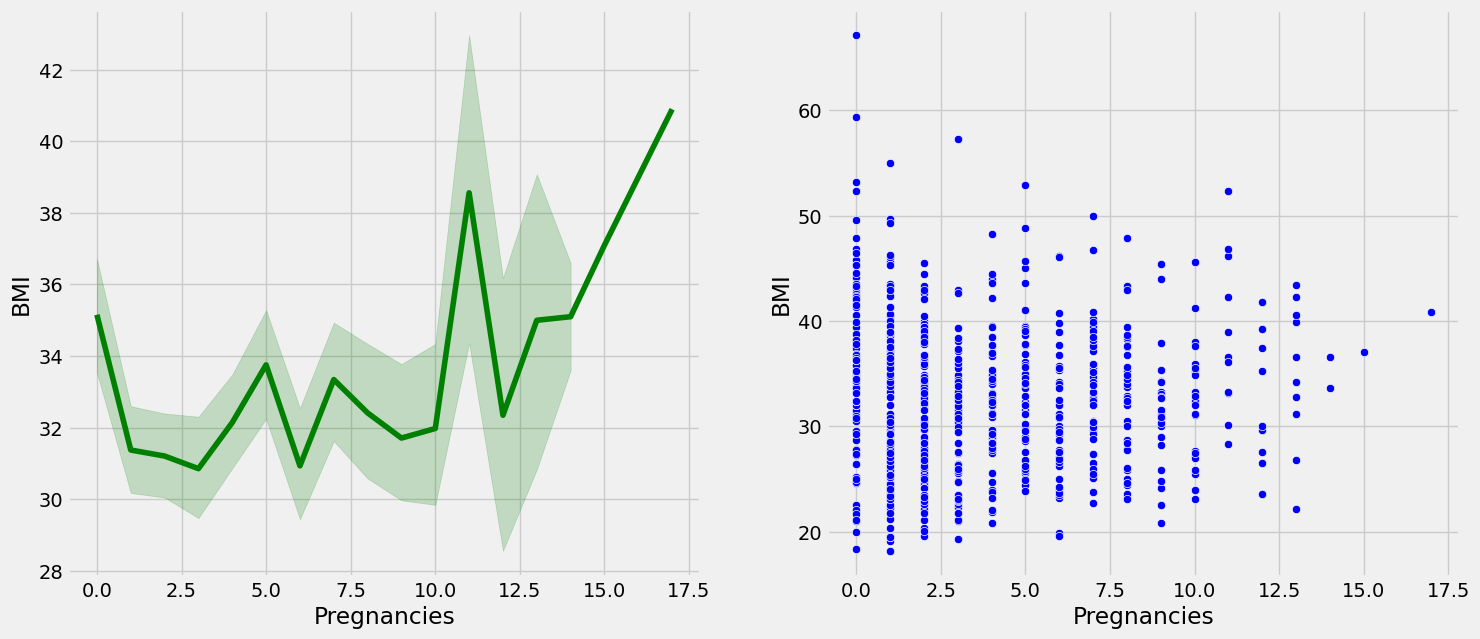

Bivariates between Pregnancies and DiabetesPedigreeFunction


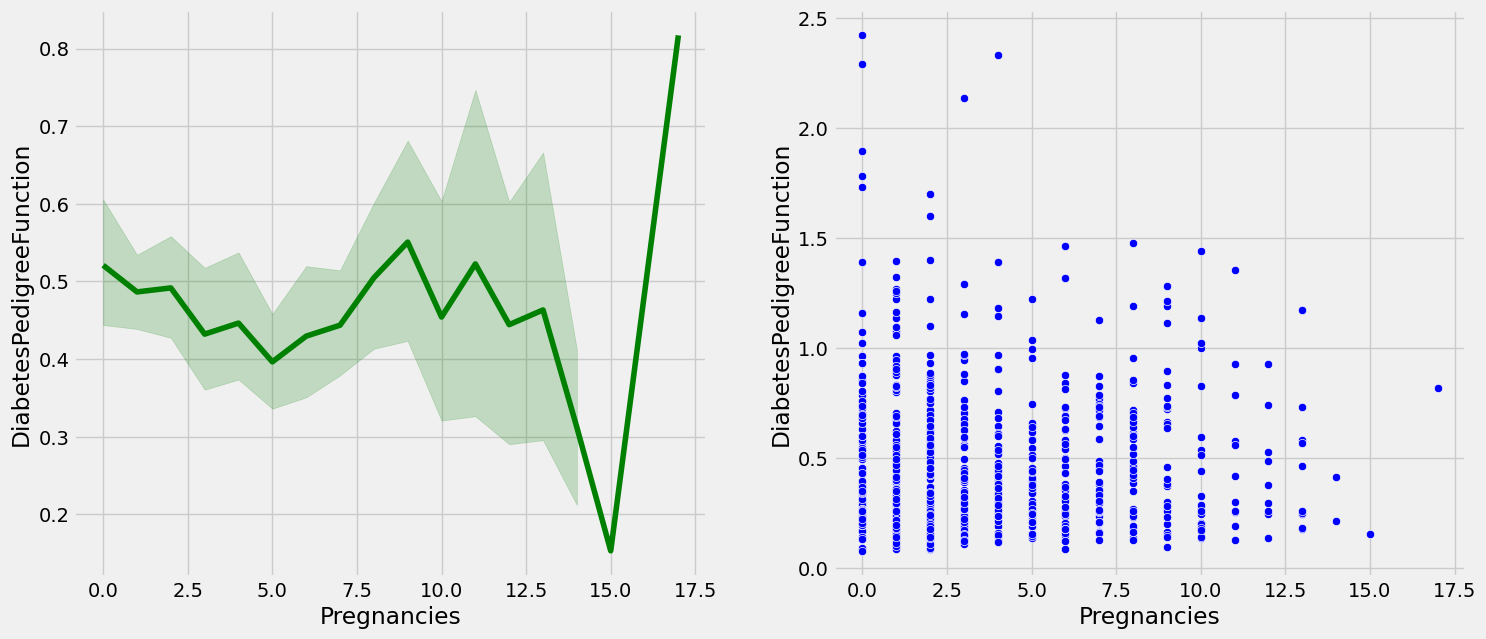

Bivariates between Pregnancies and Age


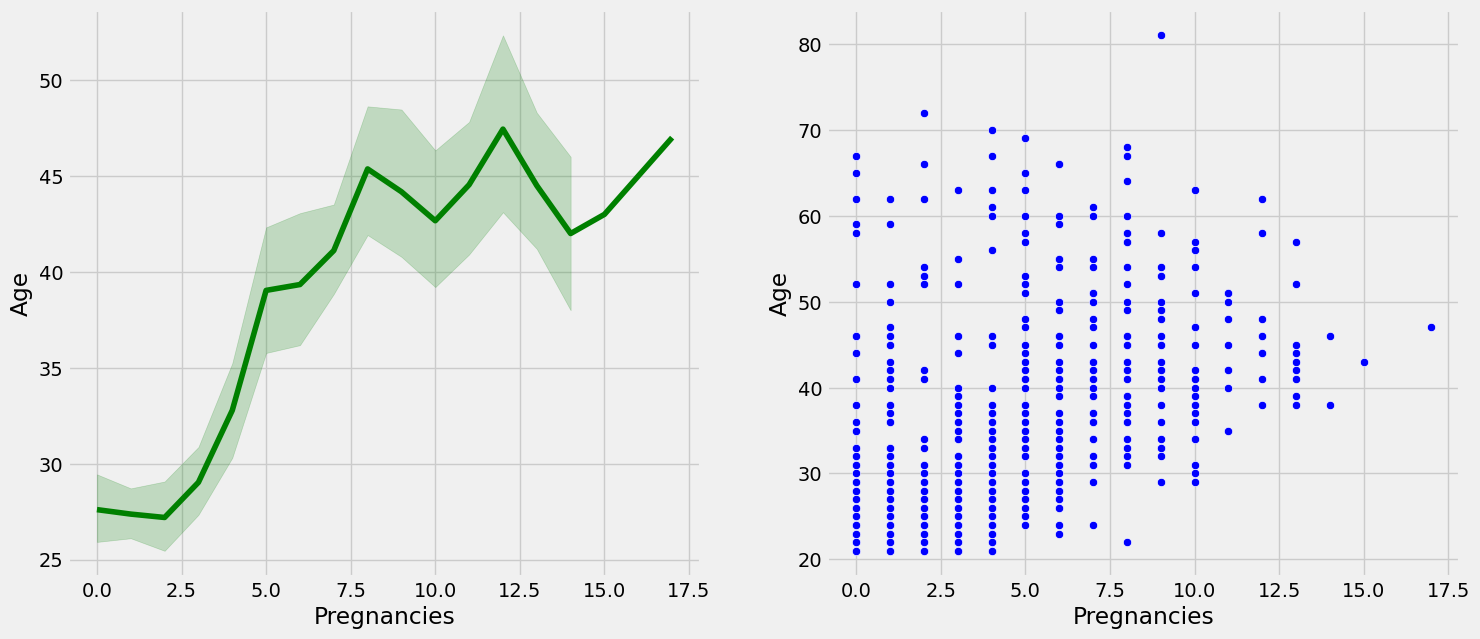

In [26]:
for col in data.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=data, feature1='Pregnancies', feature2=col)
    
    

##### MULTIVARIATE CHARTS

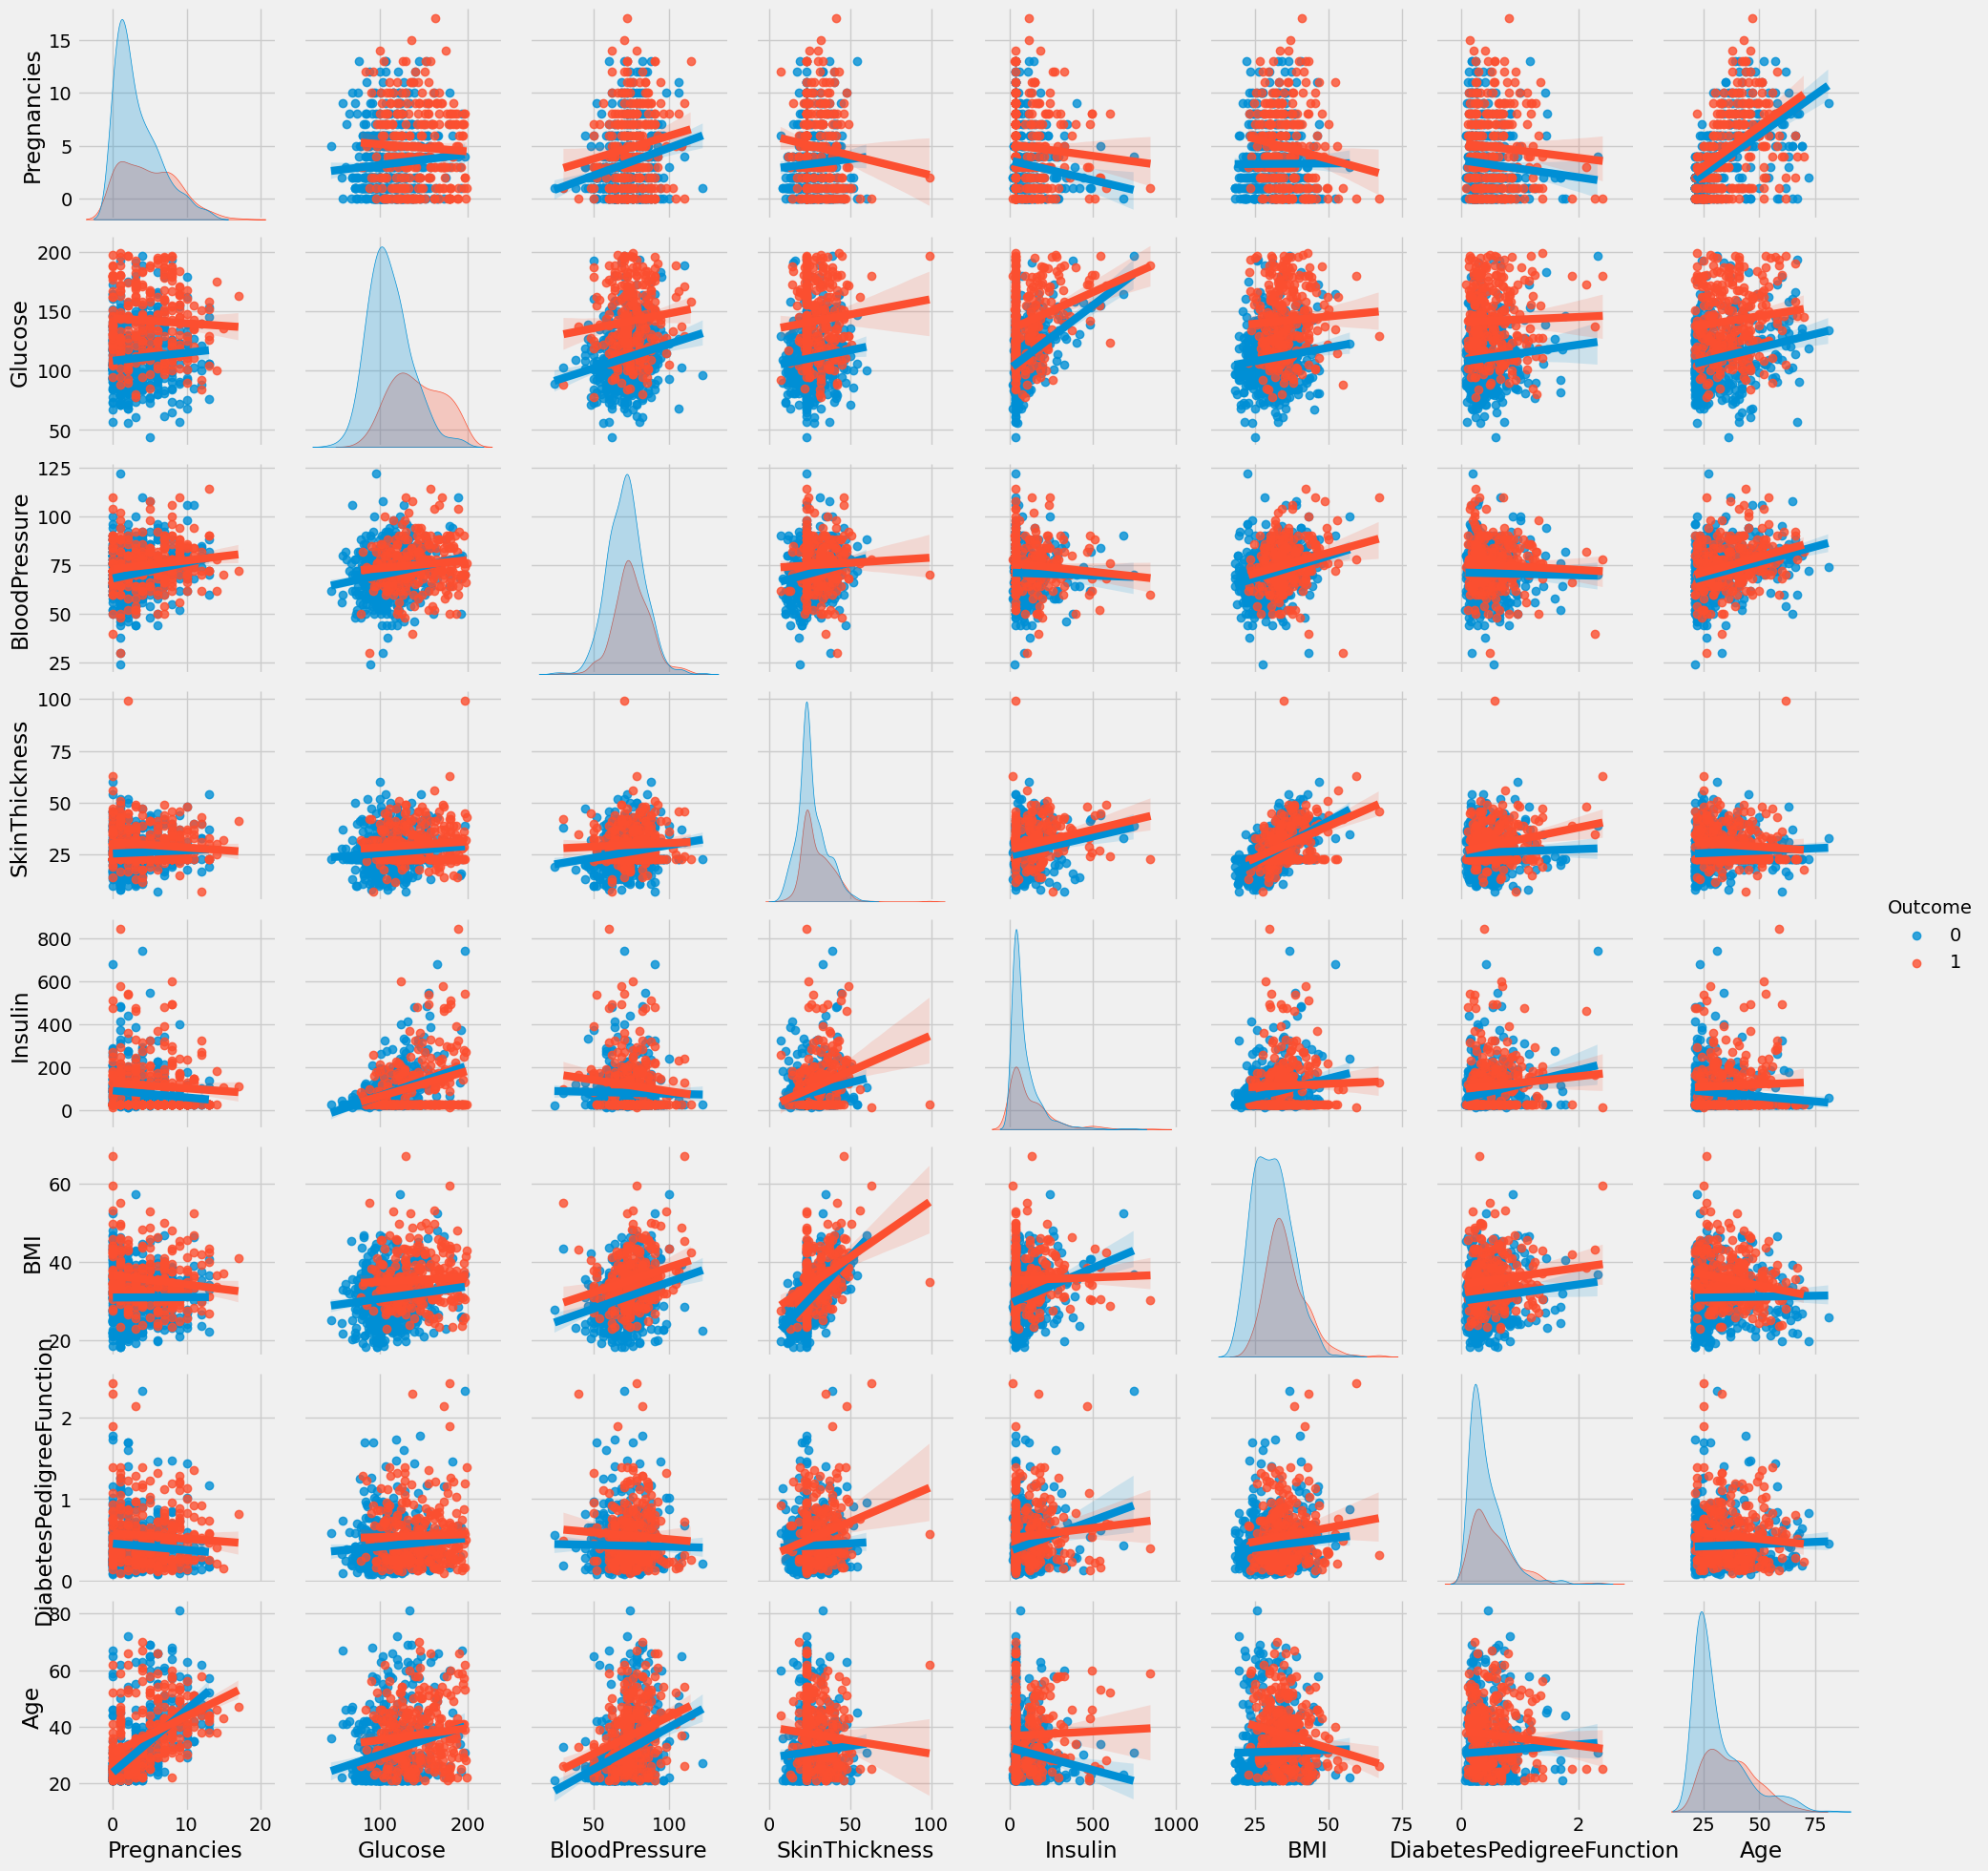

In [27]:
sns.pairplot(data=df, hue='Outcome', kind='reg')

##### Correlations and Heatmaps

In [28]:
df[df.columns[:]].corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

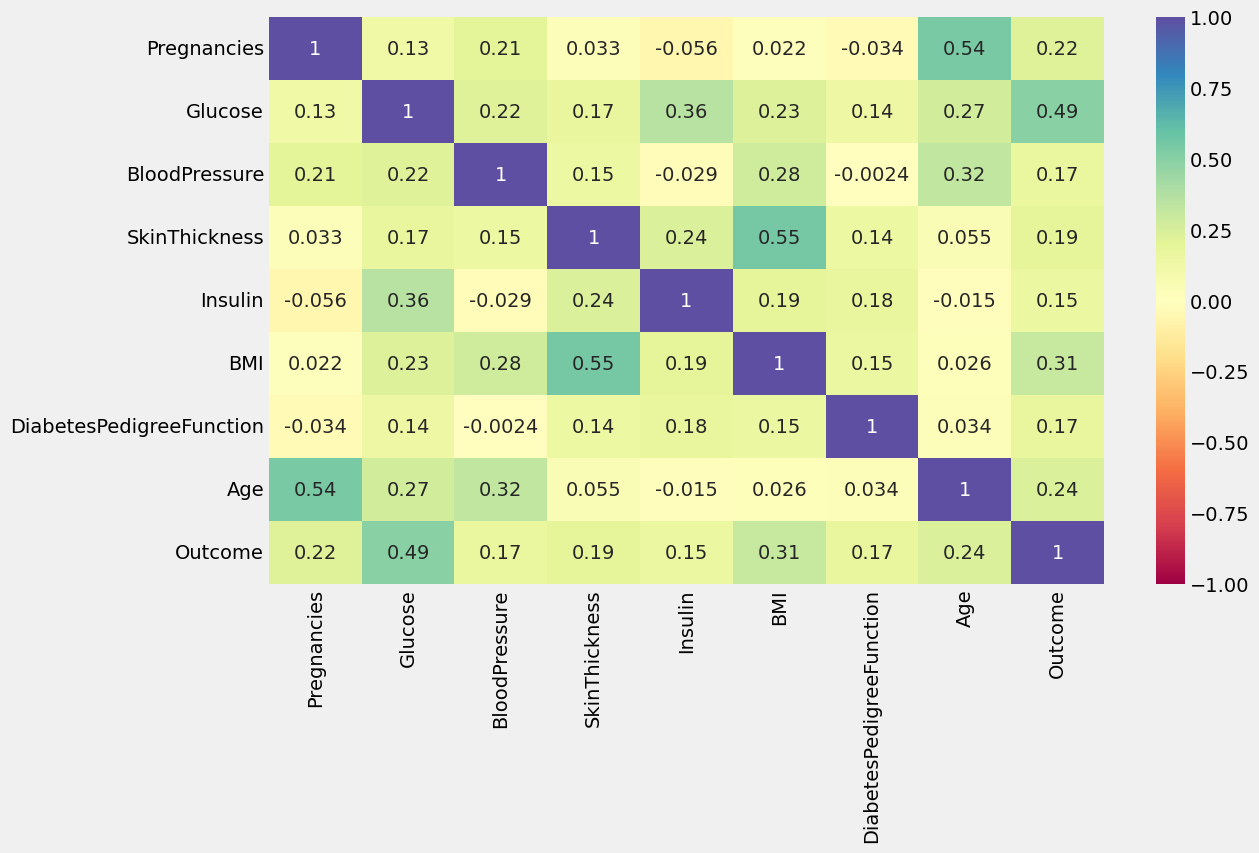

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmax=1, vmin=-1)

**Observations**
Glucose and BMI seem to be strongest predictors of Diabetes

In [31]:
%%writefile eda.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import streamlit as st
st.set_option('deprecation.showPyplotGlobalUse', False)
st.title("The EDA Page")

def main():
    st.sidebar.subheader("Please choose the plot")
    data=pd.read_csv('data.csv')
    # drop the redundant column
    data=data.drop('Unnamed: 0', axis=1)
    # treat the nulls
    zerofiller=lambda x: x.replace(0, x.median())
    cols=data.columns[1:6]
    data[cols]=data[cols].apply(zerofiller, axis=0)
    #encode categoricals
    df=data.copy()
    d={'Yes':1, 'No':0}
    df['Outcome']=df['Outcome'].map(d)
    
    def histograms(data):
        st.subheader('Univariate Histogram')
        data.hist()
        plt.tight_layout()
        st.pyplot()
    def barchart(data, feature):
        st.subheader("Barchart of Categoricals")
        ax=sns.countplot(data=data, x=feature, color='green')
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate("{:.2g}%".format(100.*y/len(data)), (x.mean(),y), ha='center' , va='bottom')                                  
        st.pyplot()
        
    def heatmap(data):
        st.subheader("The Heatmap")
        plt.figure(figsize=(12,7))
        sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmax=+1, vmin=-1)
        st.pyplot()
        
    plot=st.sidebar.selectbox('Choose Plot',('Histograms', 'Barchart', 'Heatmap'))
    if st.sidebar.button("PLOT"):
        if plot=='Histograms':
            histograms(df)
        if plot=='Barchart':
            barchart(data=df, feature='Outcome')
        if plot=='Heatmap':
            heatmap(data=df)
        
if __name__=='__main__':
    main()
        
        

    
    
    

Overwriting eda.py


In [32]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 15.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 19.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 16.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 19.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
def preprocess(data, label):
    x = df.drop(label, axis = 1)
    y = df[label]
    sm = SMOTE()
    x, y = sm.fit_resample(x, y)
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7, random_state = 100)
    return xtrain, xtest, ytrain, ytest

In [35]:
xtrain, xtest, ytrain, ytest = preprocess(df, 'Outcome')

In [36]:
ssc = StandardScaler()

In [37]:
xtrain = pd.DataFrame(ssc.fit_transform(xtrain), columns = xtrain.columns)
xtest = pd.DataFrame(ssc.transform(xtest), columns = xtest.columns)

In [48]:
def metrics(ytest, ypred, model):
    print('Metrics for the model', model)
    print('')
    print('Accuracy score is', accuracy_score(ytest, ypred))
    print('')
    print('ROC score is', roc_auc_score(ytest, ypred))
    print('')
    print('F1 score is', f1_score(ytest, ypred))
    print('')
    print('Precision score is', precision_score(ytest, ypred))
    print('')
    print('Recall score is', recall_score(ytest, ypred))
    print('')
    print('Classification Report\n\n', classification_report(ytest, ypred))

In [70]:
def plot_metrics(classifier, xtest, ytest, model):
    print('Model evaluation metric plots for', model)
    plot_confusion_matrix(classifier, xtest, ytest, display_labels = [0,1])
    print('')
    plot_roc_curve(classifier, xtest, ytest)
    print('')
    plot_precision_recall_curve(classifier, xtest, ytest)

In [54]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(xtrain, ytrain)
ypred_test_knn = knn.predict(xtest)

In [55]:
metrics(ytest, ypred_test_knn, knn)

Metrics for the model KNeighborsClassifier(n_neighbors=15)

Accuracy score is 0.78

ROC score is 0.7808456716019742

F1 score is 0.7857142857142857

Precision score is 0.7515527950310559

Recall score is 0.8231292517006803

Classification Report

               precision    recall  f1-score   support

           0       0.81      0.74      0.77       153
           1       0.75      0.82      0.79       147

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



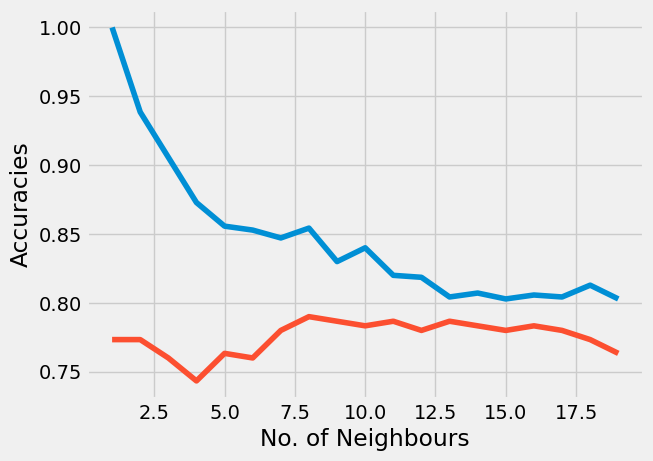

In [51]:
neighbors = np.arange(1,20)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain, ytrain)
    train_acc[i] = knn.score(xtrain, ytrain)
    test_acc[i] = knn.score(xtest, ytest)
plt.plot(neighbors, train_acc, label = 'Train Accuracies')
plt.plot(neighbors, test_acc,  label = 'Test Accuracies')
plt.xlabel('No. of Neighbours')
plt.ylabel('Accuracies')
plt.show()

In [61]:
clfs = {'KNN' : KNeighborsClassifier(),
        'Naive Bayes' : GaussianNB(),
        'Log Reg' : LogisticRegression(),
        'Decision Tree' : DecisionTreeClassifier(),
        'Random Forest' : RandomForestClassifier(),
        'AdaBoost' : AdaBoostClassifier(),
        'XGBoost' : XGBClassifier(),
        'SVM' : SVC()}
models_report = pd.DataFrame(columns = ['model', 'accuracy', 'precision', 'recall', 'f1-score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(xtrain, ytrain)
    ypred_test = clf.predict(xtest)
    print('Fitting the model...', clf_name)
    t = {'model' : clf_name,
         'accuracy' : accuracy_score(ytest, ypred_test),
         'precision' : precision_score(ytest, ypred_test),
         'recall' : recall_score(ytest, ypred_test),
         'f1-score' : f1_score(ytest, ypred_test)}
    models_report = models_report.append(t, ignore_index = True)
models_report = models_report.sort_values(by = 'f1-score', ascending = False)
models_report

Fitting the model... KNN
Fitting the model... Naive Bayes
Fitting the model... Log Reg
Fitting the model... Decision Tree
Fitting the model... Random Forest
Fitting the model... AdaBoost
Fitting the model... XGBoost
Fitting the model... SVM


,model,accuracy,precision,recall,f1-score
4,Random Forest,0.813333,0.772455,0.877551,0.821656
6,XGBoost,0.810000,0.796053,0.823129,0.809365
3,Decision Tree,0.790000,0.780000,0.795918,0.787879
7,SVM,0.790000,0.780000,0.795918,0.787879
0,KNN,0.763333,0.734568,0.809524,0.770227
5,AdaBoost,0.770000,0.767123,0.761905,0.764505
2,Log Reg,0.756667,0.756944,0.741497,0.749141
1,Naive Bayes,0.720000,0.756098,0.632653,0.688889


In [63]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
ypred_test_rf = rf.predict(xtest)
metrics(ytest, ypred_test_rf, rf)

Metrics for the model RandomForestClassifier()

Accuracy score is 0.8333333333333334

ROC score is 0.8343337334933973

F1 score is 0.8387096774193548

Precision score is 0.7975460122699386

Recall score is 0.8843537414965986

Classification Report

               precision    recall  f1-score   support

           0       0.88      0.78      0.83       153
           1       0.80      0.88      0.84       147

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



In [ ]:
param_grid = {'n_estimators' : [100, 150, 200, 250],
              'min_samples_leaf' : range(1, 10, 1),
              'min_samples_split' : range(2, 20, 2),
              'max_depth' : [2, 4, 'auto'],
              'max_features' : ['sqrt', 'log2'],
              'criterion' : ['gini', 'entropy']}
GridSearch = GridSearchCV(estimator = rf, param_grid = praram_grid, cv = 5, n_jobs = -1, verbose = 3, return_train_score = False)
GridSearch.fit(xtrain, ytrain)

In [72]:
rf_tuned = RandomForestClassifier(max_depth = 4, max_features = 'log2', min_samples_leaf = 5, min_samples_split = 4)
rf_tuned.fit(xtrain, ytrain)
ypred_test_rft = rf_tuned.predict(xtest)

Model evaluation metric plots for Pipeline




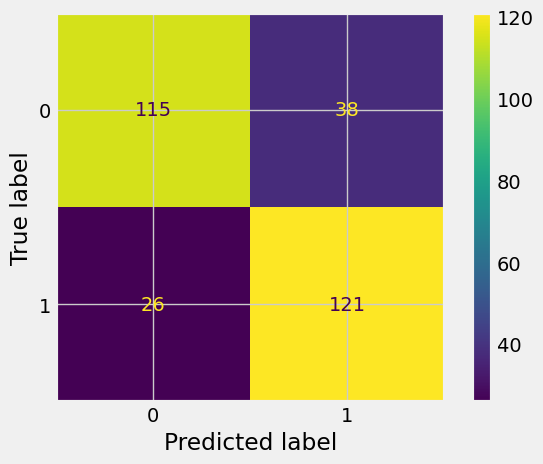

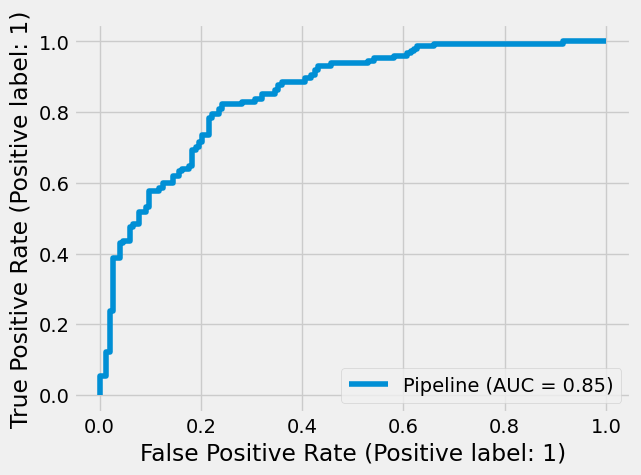

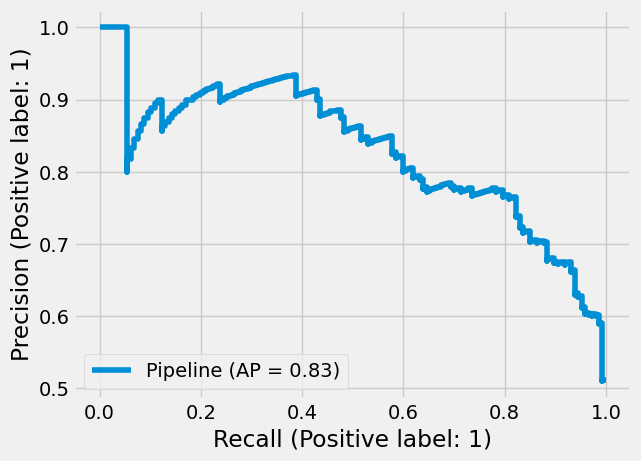

In [73]:
from sklearn.pipeline import Pipeline
ssc = StandardScaler()
steps = [('scaler', ssc), ('rf tuned', rf_tuned)]
pipeline = Pipeline(steps)
xtrain, xtest, ytrain, ytest  = preprocess(df, label = 'Outcome')
pipeline.fit(xtrain, ytrain)
ypred_test_pip = pipeline.predict(xtest)
plot_metrics(pipeline, xtest, ytest, 'Pipeline')

In [74]:
metrics(ytest, ypred_test_rft, pipeline)

Metrics for the model Pipeline(steps=[('scaler', StandardScaler()),
                ('rf tuned',
                 RandomForestClassifier(max_depth=4, max_features='log2',
                                        min_samples_leaf=5,
                                        min_samples_split=4))])

Accuracy score is 0.78

ROC score is 0.780578898225957

F1 score is 0.7828947368421053

Precision score is 0.7579617834394905

Recall score is 0.8095238095238095

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.75      0.78       153
           1       0.76      0.81      0.78       147

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [75]:
import pickle 
model = open('rf.pickle', 'wb')
pickle.dump(pipeline, model)
model.close()

In [82]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

st.title('Medical Diagnostic Web App')
st.subheader('Is the patient Diabetic?')

model = open('rf.pickle', 'rb')
clf = pickle.load(model)
model.close()

prg = st.number_input('Pregnancies', 0, 17, 0)
glu = st.slider('Glucose', 40, 200, 40)
bp = st.slider('BloodPressure', 20, 140, 20)
skt = st.slider('SkinThickness', 7.0, 99.0, 7.0 )
ins = st.slider('Insulin', 14, 850, 14)
bmi = st.slider('BMI', 18, 67, 18)
dpf = st.slider('DiabetesPedigreeFunction', 0.07, 2.50, 0.07)
age = st.number_input('Age', 20, 85, 20)

data = {'Pregnancies' : prg,
        'Glucose' : glu,
        'BloodPressure' : bp,
        'SkinThickness' : skt,
        'Insulin' : ins,
        'BMI' : bmi,
        'DiabetesPedigreeFunction' : dpf,
        'Age' : age}
input_data = pd.DataFrame([data])

preds = clf.predict(input_data)[0]

if st.button('Predict'):
    if preds == 1:
        st.error('Diabetic')
    if preds == 0:
        st.success('Non-Diabetic')

Overwriting app.py


In [80]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [83]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=35c65480fde93e955c61822970b8aca783567686ddd7db4dcd84f99c783697ce
  Stored in directory: /Users/aakashnanthan/Library/Caches/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [84]:
import pipreqs

In [ ]:
pipreqs